In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [307]:
# REading file and getting to know the data
working_file_path='M2-1 Working on thesis paper.xlsx'
df = pd.read_excel(working_file_path,sheet_name='All Data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1           3406 non-null   int64  
 1   PRICE       3406 non-null   object 
 2   BRANDNAME   3406 non-null   object 
 3   MAKEYEAR    3386 non-null   float64
 4   FUEL        3406 non-null   object 
 5   KM          2811 non-null   object 
 6   BODY        3406 non-null   object 
 7   GEARBOX     3406 non-null   object 
 8   DRIVE       3406 non-null   object 
 9   COLOR       3406 non-null   object 
 10  POSTDATE    3405 non-null   object 
 11  MILEAGE     1676 non-null   object 
 12  ENGINE(CC)  2802 non-null   float64
 13  KM_INT      2394 non-null   float64
 14  PRICE_NEW   3406 non-null   int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 399.3+ KB


In [308]:
# copying the data frame to an updated data frame and dropiing unnecessary data row with null value in any column
df1=df
df1=df1.drop('MILEAGE', axis=1)
df1=df1.drop('KM', axis=1)
df1=df1.drop('PRICE', axis=1)
df1=df1.drop('POSTDATE', axis=1)

df1.dropna(inplace=True)

df1.info()
# Display or use the filtered DataFrame as needed
# df2 = df.loc[:, ["MAKEYEAR", "KM_INT","PRICE_NEW","BRANDNAME","FUEL","BODY","GEARBOX","DRIVE","COLOR"]]
# df2.dropna(inplace=True)
# df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2391 entries, 0 to 3387
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1           2391 non-null   int64  
 1   BRANDNAME   2391 non-null   object 
 2   MAKEYEAR    2391 non-null   float64
 3   FUEL        2391 non-null   object 
 4   BODY        2391 non-null   object 
 5   GEARBOX     2391 non-null   object 
 6   DRIVE       2391 non-null   object 
 7   COLOR       2391 non-null   object 
 8   ENGINE(CC)  2391 non-null   float64
 9   KM_INT      2391 non-null   float64
 10  PRICE_NEW   2391 non-null   int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 224.2+ KB


In [309]:
# coding all brandname with data less than 100 to Other and leaving rest as it is to check impact of Brandname

pd.set_option('display.max_rows', None)
dfNew=df1.copy();
valueCount=df1.value_counts('BRANDNAME')
# print(valueCount)
brands_to_keep = valueCount[valueCount > 100].index.tolist()
# print(brands_to_keep)
dfNew['BRANDNAME'] = dfNew['BRANDNAME'].apply(lambda x: x if x in brands_to_keep else 'Other Brand')

print(dfNew.value_counts('BRANDNAME'))



BRANDNAME
Other Brand      576
Hyundai          572
Maruti Suzuki    516
Ford             172
Tata             158
Toyota           154
Kia              122
Mahindra         121
Name: count, dtype: int64


In [310]:
#Coding all Body type to specific set of data i.e. Compact SUV, Suv and Jeep SUV to SUV and Small Hatchback, Medium hatchback to hatchback 
# We 
valueCount=df1.value_counts('BODY')
print(valueCount)
dfNew['BODY'] = dfNew['BODY'].replace({r'.*SUV.*': 'SUV', r'.*Hatchback.*': 'Hatchback'}, regex=True, inplace=False)
#Removing  row of data with count of body type  less than 50
dfNew = dfNew[dfNew['BODY'].map(dfNew['BODY'].value_counts()) >= 50]
print(dfNew.value_counts('BODY'))



BODY
Small Hatchback      492
SUV Jeep             459
Midsize Hatchback    416
Compact SUV          313
Sedan                294
Pickup               164
SUV                  125
Van                   67
Hatchback             60
Convertibles           1
Name: count, dtype: int64
BODY
Hatchback    968
SUV          897
Sedan        294
Pickup       164
Van           67
Name: count, dtype: int64


In [311]:
# coding all Color with data less than 100 to Other and leaving rest as it is to check impact of color

valueCount=df1.value_counts('COLOR')
print(valueCount)
colorsToKeep = valueCount[valueCount > 100].index.tolist()
print(colorsToKeep)
dfNew['COLOR'] = dfNew['COLOR'].apply(lambda x: x if x in colorsToKeep else 'Other Color')

print(dfNew.value_counts('COLOR'))



COLOR
Silver    642
Gray      392
White     320
Red       177
Blue      155
Other     142
white     139
Black      75
Brown      75
Maroon     67
Green      39
Golden     38
Beige      35
blue       26
Yellow     16
black      16
Orange     15
WHITE      10
BLUE        4
Army        4
beige       1
WHite       1
BLACK       1
red         1
Name: count, dtype: int64
['Silver', 'Gray', 'White', 'Red', 'Blue', 'Other', 'white']
COLOR
Silver         642
Other Color    424
Gray           392
White          320
Red            177
Blue           154
Other          142
white          139
Name: count, dtype: int64


array([[<Axes: title={'center': '1'}>,
        <Axes: title={'center': 'MAKEYEAR'}>],
       [<Axes: title={'center': 'ENGINE(CC)'}>,
        <Axes: title={'center': 'KM_INT'}>],
       [<Axes: title={'center': 'PRICE_NEW'}>, <Axes: >]], dtype=object)

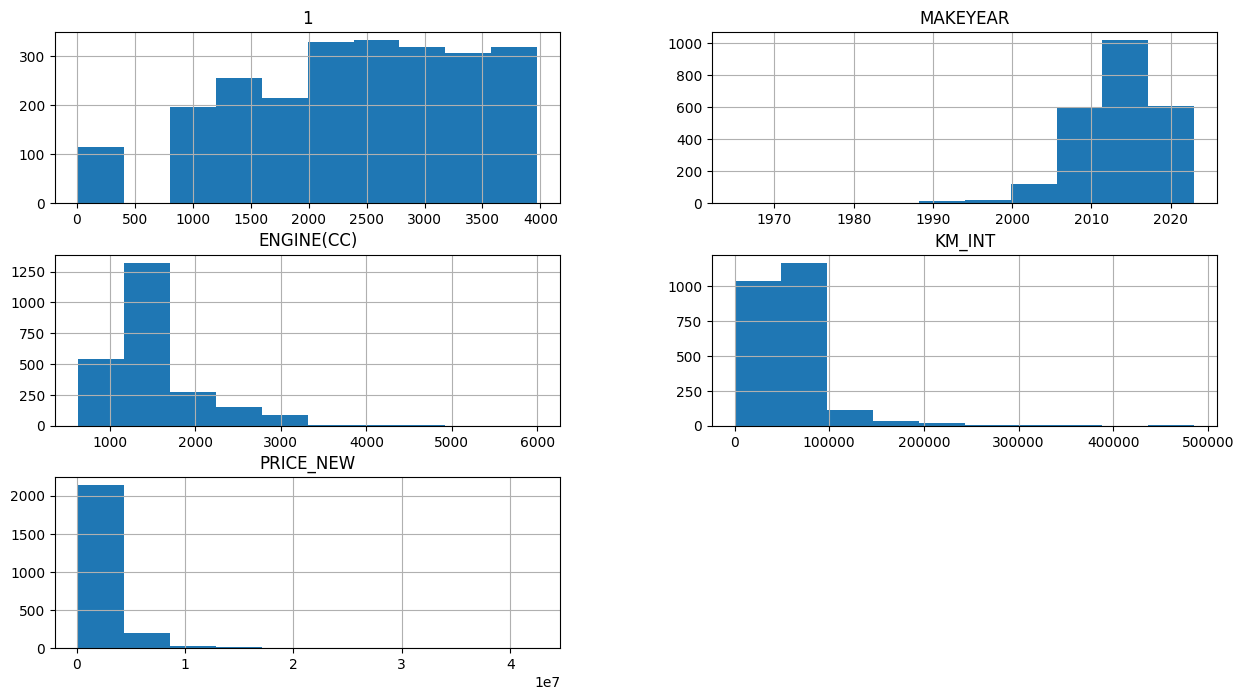

In [312]:
#we again join the above splitted values of independent and dependent variables to see various statistics
#Plot the histogram to see the frequency of data
# train_data=X_train.join(y_train)
dfNew.hist(figsize=(15,8))

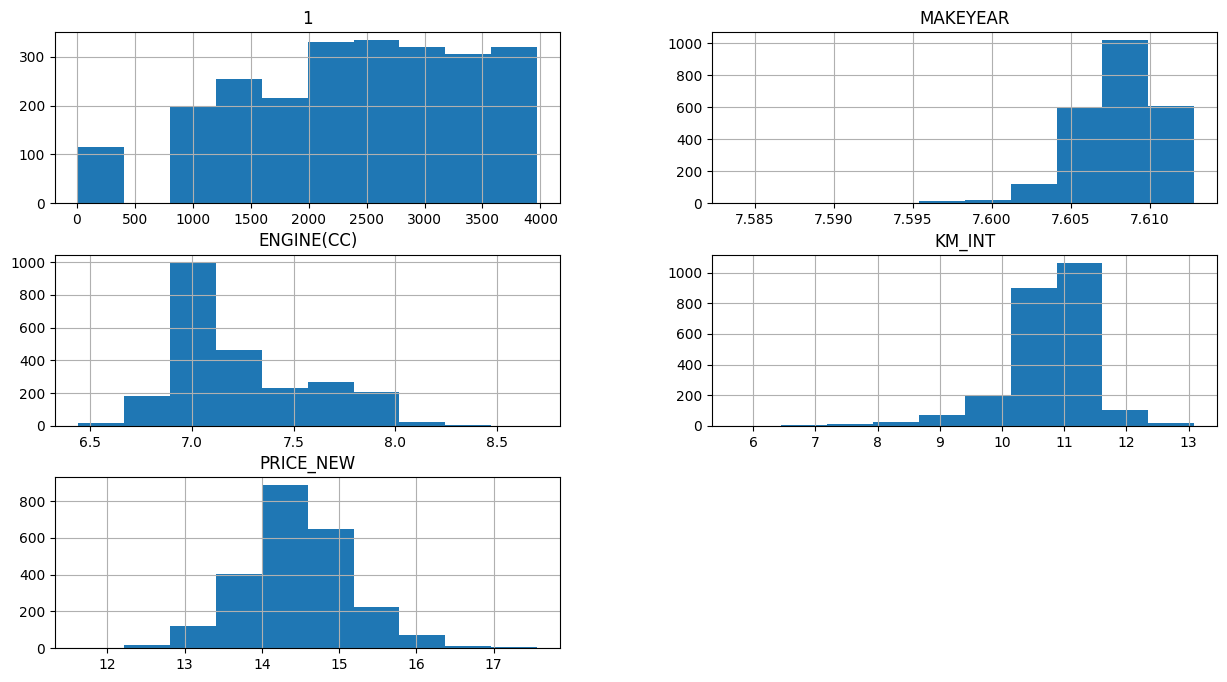

In [313]:
# Since the above histogram does not look to be right or left squed and are not a bell shaped curve so we take logaarithm value
log_dfNew=dfNew.copy();
log_dfNew['PRICE_NEW'] =np.log(dfNew['PRICE_NEW']+1);
log_dfNew['ENGINE(CC)'] =np.log(dfNew['ENGINE(CC)']+1);
log_dfNew['KM_INT'] =np.log(dfNew['KM_INT']+1);
log_dfNew['MAKEYEAR'] =np.log(dfNew['MAKEYEAR']+1);
log_dfNew.hist(figsize=(15,8));


            PRICE_NEW  ENGINE(CC)    KM_INT  MAKEYEAR
PRICE_NEW    1.000000    0.453314 -0.138882  0.302033
ENGINE(CC)   0.453314    1.000000  0.162603 -0.057208
KM_INT      -0.138882    0.162603  1.000000 -0.401706
MAKEYEAR     0.302033   -0.057208 -0.401706  1.000000


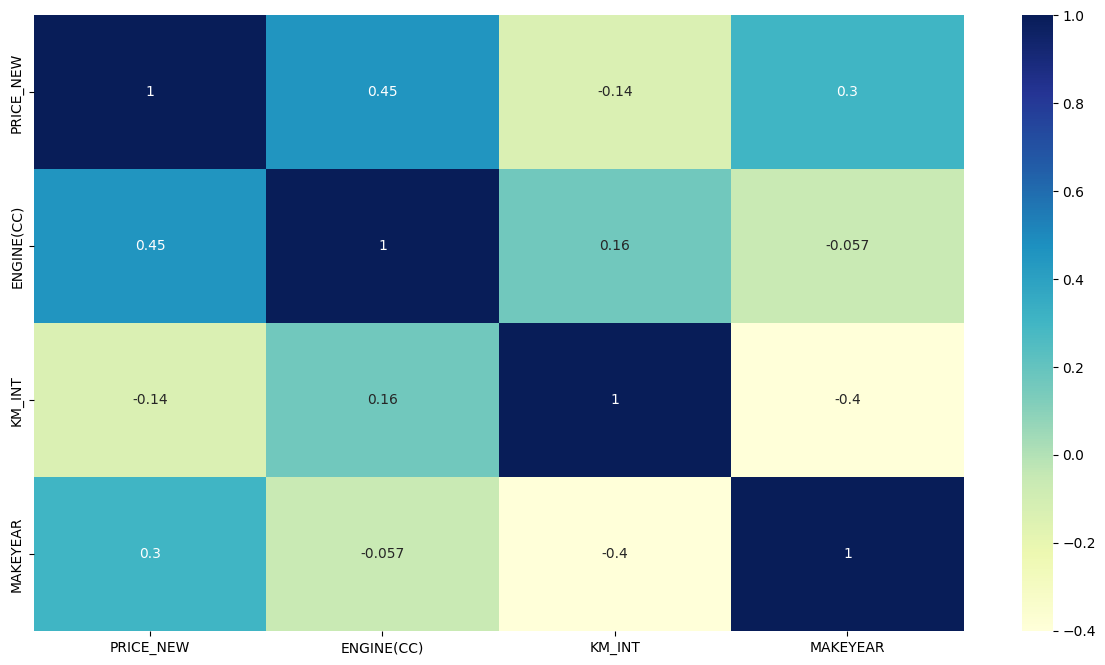

In [314]:
#Plot and see the correlation of various variables with plain train_Data
plt.figure(figsize=(15,8))
numericalData=dfNew[["PRICE_NEW","ENGINE(CC)","KM_INT","MAKEYEAR"]]
print(numericalData.corr());
sns.heatmap(numericalData.corr(),annot=True,cmap="YlGnBu");

            PRICE_NEW  ENGINE(CC)    KM_INT  MAKEYEAR
PRICE_NEW    1.000000    0.500578 -0.279023  0.481482
ENGINE(CC)   0.500578    1.000000  0.129760 -0.039379
KM_INT      -0.279023    0.129760  1.000000 -0.473980
MAKEYEAR     0.481482   -0.039379 -0.473980  1.000000


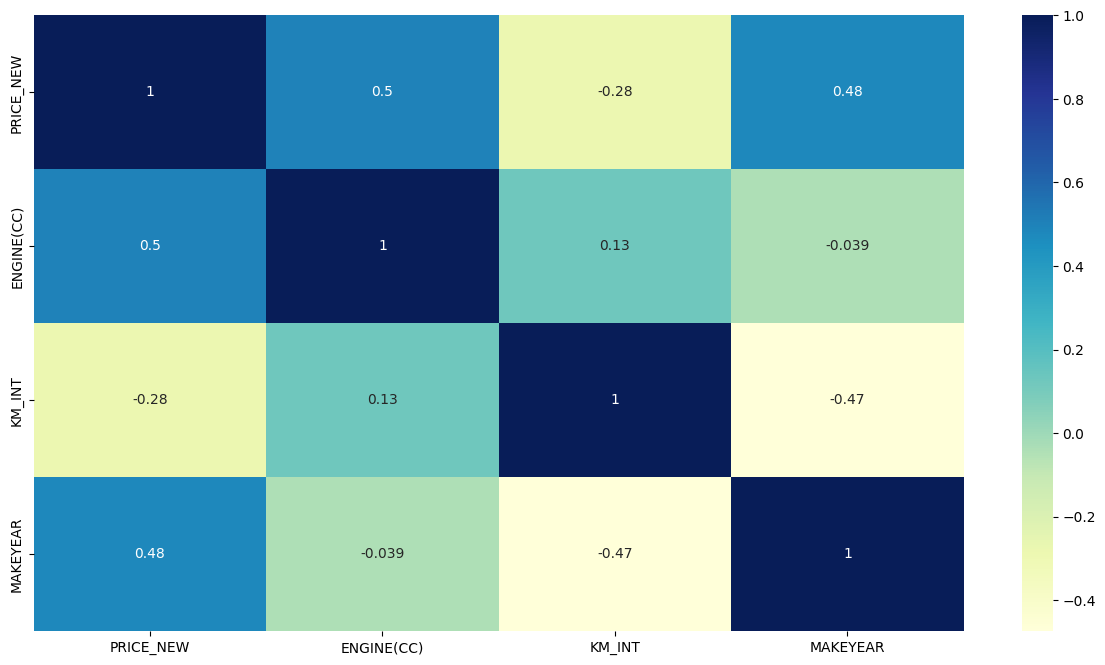

In [315]:
#Plot and see the correlation of various variables with Log of data
plt.figure(figsize=(15,8))
logNumericalData=log_dfNew[["PRICE_NEW","ENGINE(CC)","KM_INT","MAKEYEAR"]]
print(logNumericalData.corr());
sns.heatmap(logNumericalData.corr(),annot=True,cmap="YlGnBu");

In [316]:
#Creating dummy variables for brand , color and body type,
# Also creating dummy variables for binary data like Fuel, Drive, Gearbox

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dfNew['FUEL'] = label_encoder.fit_transform(dfNew['FUEL'])
dfNew['DRIVE'] = label_encoder.fit_transform(dfNew['DRIVE'])
dfNew['GEARBOX'] = label_encoder.fit_transform(dfNew['GEARBOX'])
dfNew=dfNew.join(pd.get_dummies(dfNew.BRANDNAME)).drop(['BRANDNAME'], axis=1);
dfNew=dfNew.join(pd.get_dummies(dfNew.COLOR)).drop(['COLOR'], axis=1);
dfNew=dfNew.join(pd.get_dummies(dfNew.BODY)).drop(['BODY'], axis=1);


In [317]:
#With this all data has been added as dummies or integers and the Data set is ready to check correlation and finally run regression
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2390 entries, 0 to 3387
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1              2390 non-null   int64  
 1   MAKEYEAR       2390 non-null   float64
 2   FUEL           2390 non-null   int64  
 3   GEARBOX        2390 non-null   int64  
 4   DRIVE          2390 non-null   int64  
 5   ENGINE(CC)     2390 non-null   float64
 6   KM_INT         2390 non-null   float64
 7   PRICE_NEW      2390 non-null   int64  
 8   Ford           2390 non-null   bool   
 9   Hyundai        2390 non-null   bool   
 10  Kia            2390 non-null   bool   
 11  Mahindra       2390 non-null   bool   
 12  Maruti Suzuki  2390 non-null   bool   
 13  Other Brand    2390 non-null   bool   
 14  Tata           2390 non-null   bool   
 15  Toyota         2390 non-null   bool   
 16  Blue           2390 non-null   bool   
 17  Gray           2390 non-null   bool   
 18  Other        

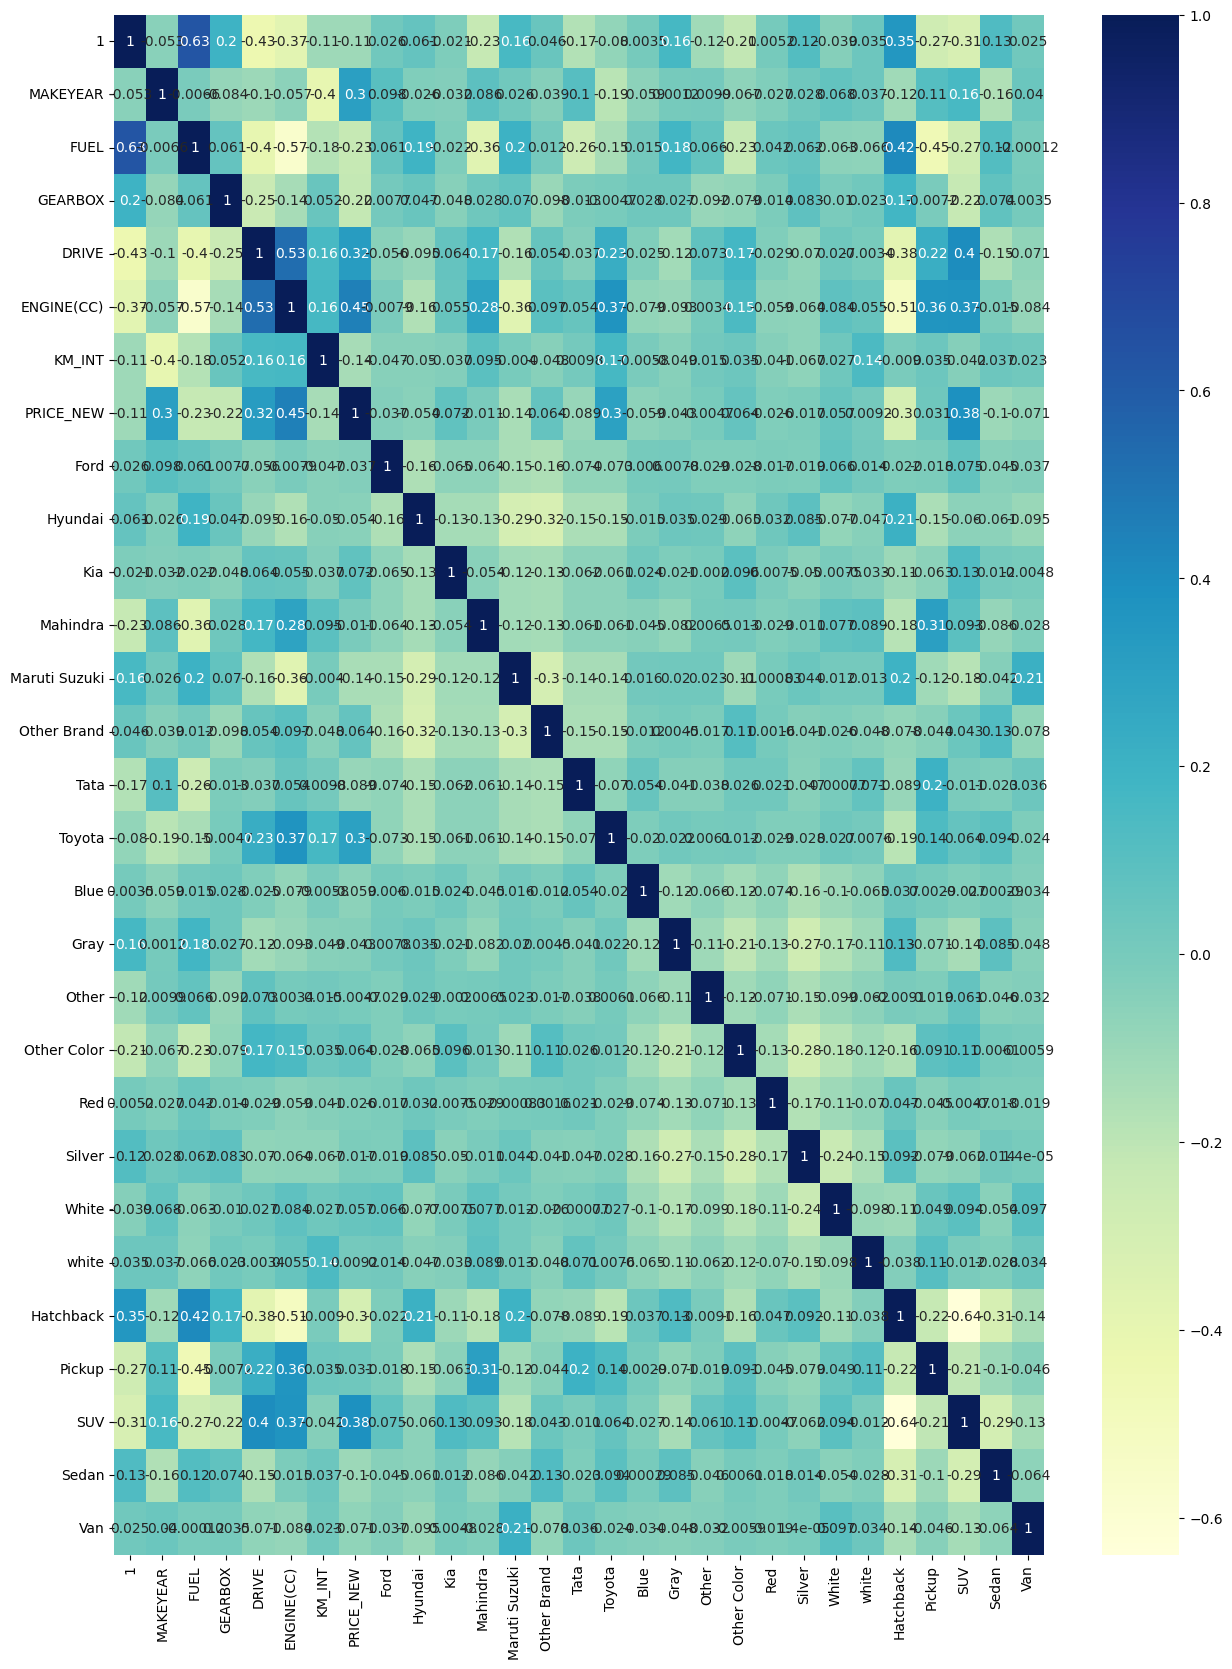

In [318]:
#Check the correlation and heat map
plt.figure(figsize=(15,20))
# print(train_data.corr());
sns.heatmap(dfNew.corr(),annot=True,cmap="YlGnBu");

In [319]:
# # Plotting a scatterplot to see the view
# plt.figure(figsize=(15,8))
# sns.scatterplot(x="MAKEYEAR",y="KM_INT", data=dfNew, hue="PRICE_NEW",palette="coolwarm")

In [320]:
#Running Linear regression for Make year and km

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

dfNewCopy = dfNew.iloc[1:, :].copy()
dfNewCopy = dfNewCopy.drop(columns=dfNewCopy.columns[0])


# Now splitting training  Data and Test data (We use 80% of Data as training data and 20% data is Test data)
X=dfNewCopy.drop(['PRICE_NEW'],axis=1);

y=dfNewCopy['PRICE_NEW'];

X = X.iloc[1:, :]
y = y.iloc[1:]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

# print(len(y_test))

model=LinearRegression();
model.fit(X_train,y_train)
R2=model.score(X_test,y_test)
y_pred = model.predict(X_test)

#Now Predicting for test data

print("R2 score is : ",R2)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

#computing r2
# y = y.values.reshape(-1, 1)
# y_pred = y_pred.values.reshape(-1, 1)
# r2=r2_score(y, y_pred);
# print('Adjusted r2 is : ',r2)

print("***********Running a Random Forest Regression***********")

#running a random forest Regressor to boost performance
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()
forest.fit(X_train, y_train)
newr2=forest.score(X_test,y_test)
print("The new R2 score after Random Forest Regression is : ",newr2)

R2 score is :  0.5464904642617385
Mean Absolute Error: 825428.3906200083
Mean Squared Error: 1549168819380.9438
Root Mean Squared Error: 1244656.1048662974
***********Running a Random Forest Regression***********


/Volumes/Files & Storage/codes/python/carsScrape/virtualenv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


The new R2 score after Random Forest Regression is :  0.7774934573887433


https://www.youtube.com/watch?v=Wqmtf9SA_kk&ab_channel=NeuralNine
https://www.youtube.com/watch?v=xu0prYu5e-c&ab_channel=AliNasserEddine